# This notebook is part of section 5.5

## Import Libraries

In [5]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

## Load the dataset

In [6]:
data=fetch_20newsgroups()

## Split the dataset

In [7]:
train=fetch_20newsgroups(subset='train')
test=fetch_20newsgroups(subset='test')

## Train the Model

In [8]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels=model.predict(test.data)

## Confusion Matrix

Text(115,0.5,'predcited label')

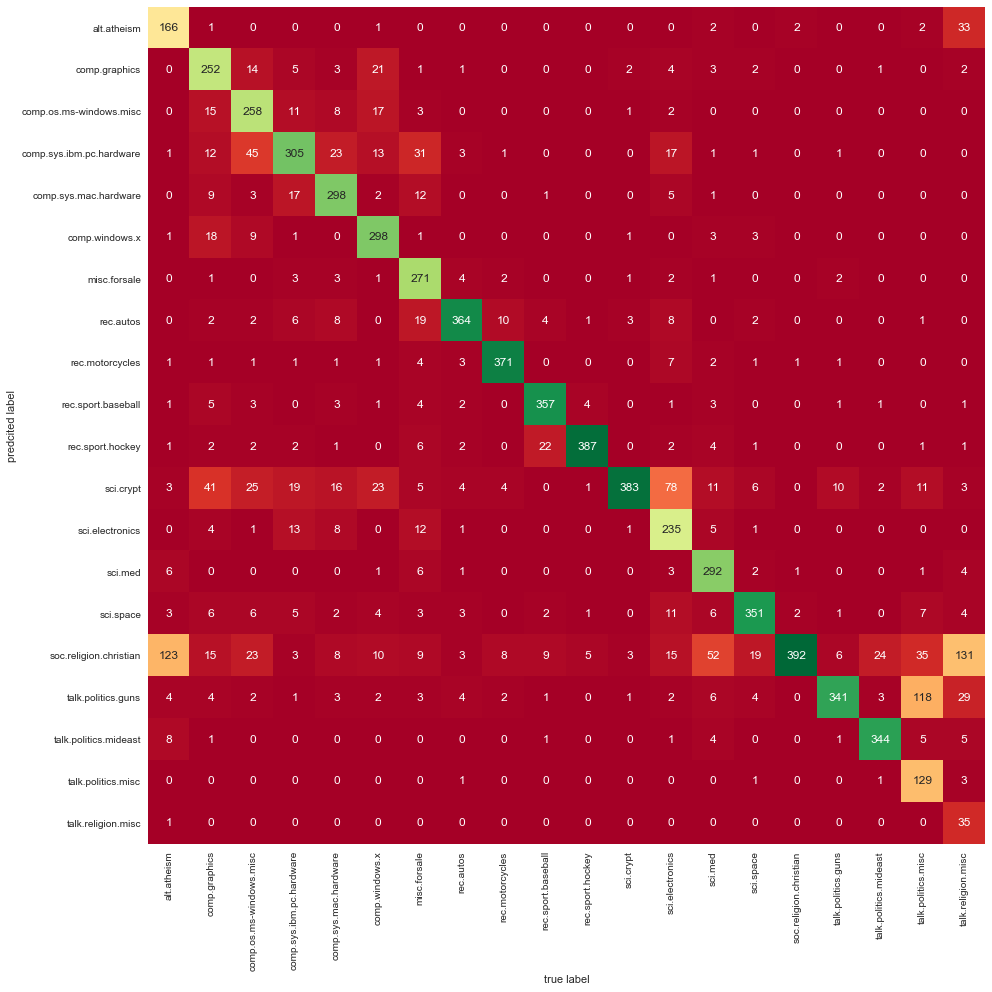

In [10]:
mat=confusion_matrix(test.target,labels)
plt.figure(figsize=(15,30))
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            cmap='RdYlGn',
           xticklabels=train.target_names,
           yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predcited label')

## Make Predictions

In [11]:
## Function to predict category
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [12]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [13]:
predict_category('Bush')

'talk.politics.misc'